# GRIP : THE SPARK FOUNDATION

###Data Science & Business Analytics Intern January 2023 Batch(#GRIPJan2023)


#Name: RESHINA.E.N

##Task 3: Exploratory DataAnalysis - Retail

##Problem Statement: As a business manager, try to find out the weak areas where you can
work to make more profit.
● What all business problems you can derive by exploring the data?


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

import statsmodels.api as sm
from scipy import stats


from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# load the dataset
df= pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
#checking information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#checking missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No Mising Values

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

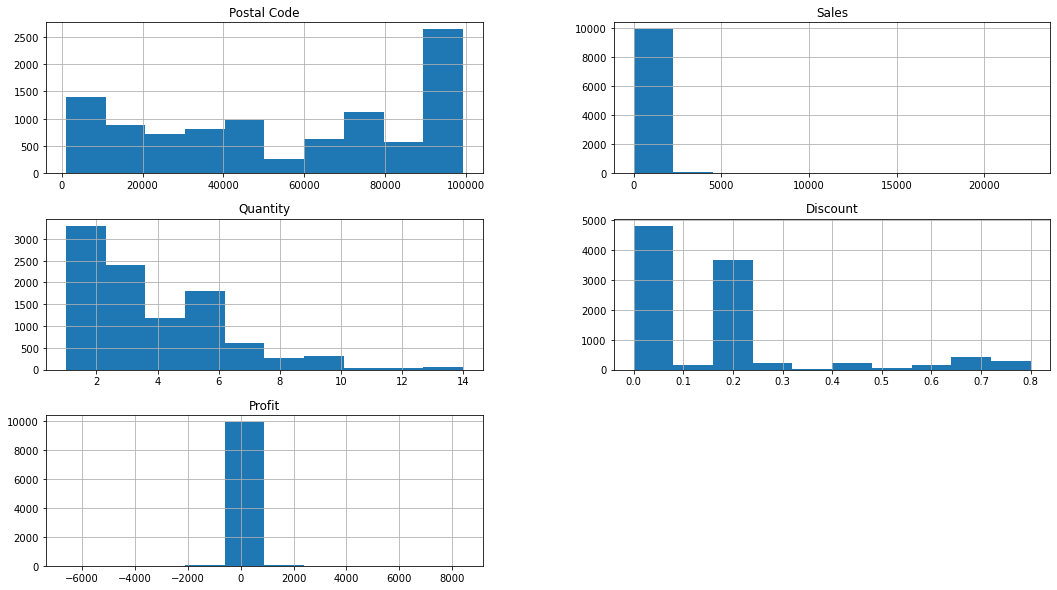

In [8]:
df.hist(bins = 10,figsize =( 18,10))

In [9]:
#finding the correlation of the dataset
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

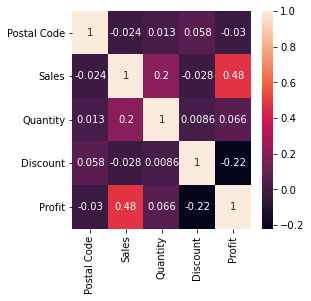

In [10]:
plt.figure(figsize= (4,4,))
sns.heatmap(df.corr(),annot = True)

##Outliers

<AxesSubplot:>

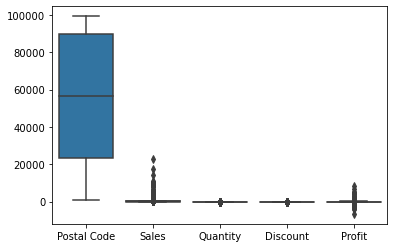

In [11]:
sns.boxplot(data = df)

In [13]:
## checking duplicate values
df.duplicated().sum()

17

In [14]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Visualisation

In [16]:
df.sort_values('Profit',ascending = False)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904


From the above visualisaton we can conclude that the state like Indiana,Washington,Delaware,Michigan etc making profits and states like Illinois,Colorado,Texas shows loss.

In [17]:
df.groupby('Region').sum(['Profit']).sort_values('Profit')

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151786150,501239.8908,8780,558.34,39706.3625
South,55875052,391721.9050,6209,238.55,46749.4303
East,50171698,678781.2400,10618,414.00,91522.7800
West,293739752,725457.8245,12266,350.20,108418.4489


This shows the Region wise Profit.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

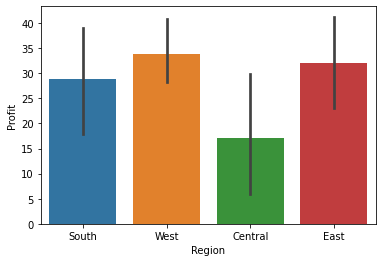

In [18]:
sns.barplot(x='Region',y = 'Profit',data = df)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

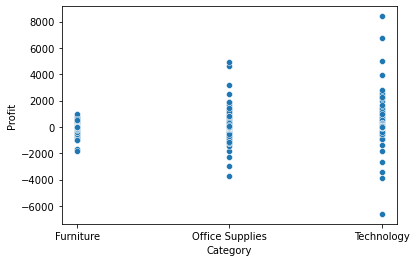

In [19]:
sns.scatterplot(data = df,x= 'Category',y = 'Profit')

<AxesSubplot:xlabel='Category', ylabel='Sales'>

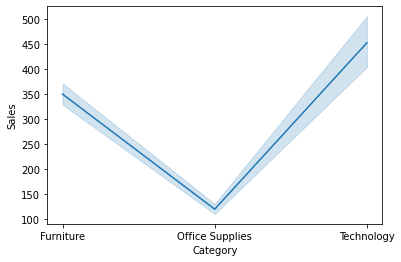

In [20]:
sns.lineplot(data = df,x= 'Category',y ='Sales')

The Category sales shows furniture and Technology high compared to Office Supplies very less.

In [21]:
df.groupby(['Region','Category']).sum(['Profit']).sort_values('Profit')

Postal Code        Sales  Quantity  Discount  \
Region  Category                                                        
Central Furniture           31498984  163797.1638      1827    143.04   
East    Furniture           10407666  208291.2040      2214     92.60   
South   Furniture           11471303  117298.6840      1291     40.35   
Central Office Supplies     92822095  167026.4150      5409    359.40   
West    Furniture           64818073  252612.7435      2696     92.90   
South   Office Supplies     34072173  125651.3130      3800    166.60   
        Technology          10331576  148771.9080      1118     31.60   
Central Technology          27465071  170416.3120      1544     55.90   
East    Office Supplies     29791451  205516.0550      6462    244.70   
West    Technology          54834526  251991.8320      2335     80.20   
East    Technology           9972581  264973.9810      1942     76.70   
West    Office Supplies    174087153  220853.2490      7235    177.10   

                             Profit  
Region  Category                     
Central Furniture        -2871.0494  
East    Furniture         3046.1658  
South   Furniture         6771.2061  
Central Office Supplies   8879.9799  
West    Furniture        11504.9503  
South   Office Supplies  19986.3928  
        Technology       19991.8314  
Central Technology       33697.4320  
East    Office Supplies  41014.5791  
West    Technology       44303.6496  
East    Technology       47462.0351  
West    Office Supplies  52609.8490

Here the company got loss from the central region and from the category furniture.

In [24]:
df.groupby('Segment')['Profit'].sum()

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='count'>

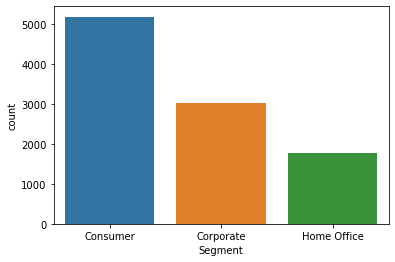

In [30]:
sns.countplot(x=df['Segment'])

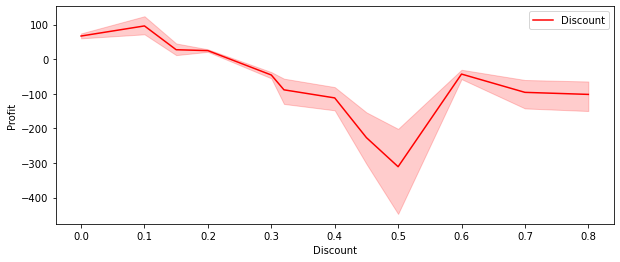

In [33]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit',data = df,color = 'r',label = 'Discount')
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Kentucky'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Wisconsin'),
  Text(7, 0, 'Utah'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Pennsylvania'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Minnesota'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'Delaware'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'New York'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Virginia'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Alabama'),
  Text(20, 0, 'South Carolina'),
  Text(21, 0, 'Oregon'),
  Text(22, 0, 'Colorado'),
  Text(23, 0, 'Iowa'),
  Text(24, 0, 'Ohio'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'New Mexico'),
  Text(28, 0, 'Louisiana'),


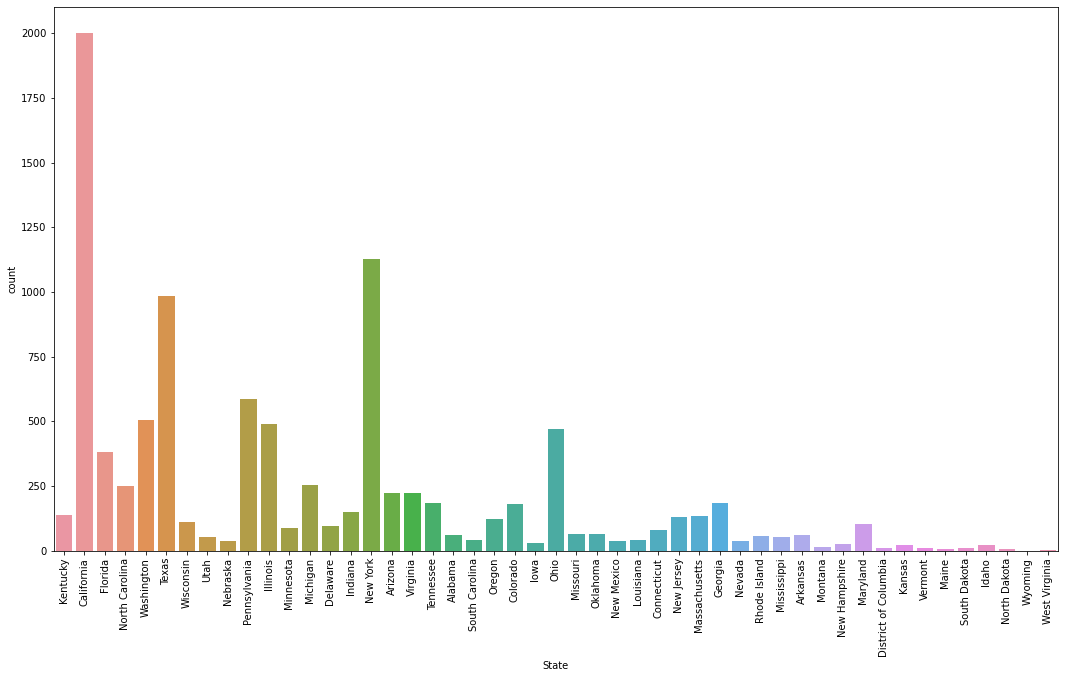

In [38]:
plt.figure(figsize = (18,10))
sns.countplot(df['State'])
plt.xticks(rotation = 90)

##Conclusion

.From the above analysis we have to conclude that the company needs to take necessary steps to reduce the loss of the states like Illinois,Colorado,Texas.
The Category wise sales shows furniture and Technology high compared to Office Supplies very less. So necessary steps should taken by the company to increase the sales of office supplies.